<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_8_(ORDERS)_MRM_10_Feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn

<ipython-input-2-22ee1092a3dd>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
<ipython-input-2-22ee1092a3dd>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SHIPDATE'] = pd.to_datetime(df['SHIPDATE'])


Descriptive Statistics:
              ROWID       ORDERID                      ORDERDATE  \
count  8399.000000   8399.000000                           8399   
mean   4200.000000  29965.179783  2010-12-26 22:35:38.826050816   
min       1.000000      3.000000            2009-01-01 00:00:00   
25%    2100.500000  15011.500000            2009-12-20 00:00:00   
50%    4200.000000  29857.000000            2010-12-17 00:00:00   
75%    6299.500000  44596.000000            2012-01-01 12:00:00   
max    8399.000000  59973.000000            2012-12-30 00:00:00   
std    2424.726789  17260.883447                            NaN   

       ORDERQUANTITY         SALES     DISCOUNT        PROFIT    UNITPRICE  \
count    8399.000000   8399.000000  8399.000000   8399.000000  8399.000000   
mean       25.571735   1775.878179     0.049671    181.184424    89.346259   
min         1.000000      2.240000     0.000000 -14140.700000     0.990000   
25%        13.000000    143.195000     0.020000    -83.3150

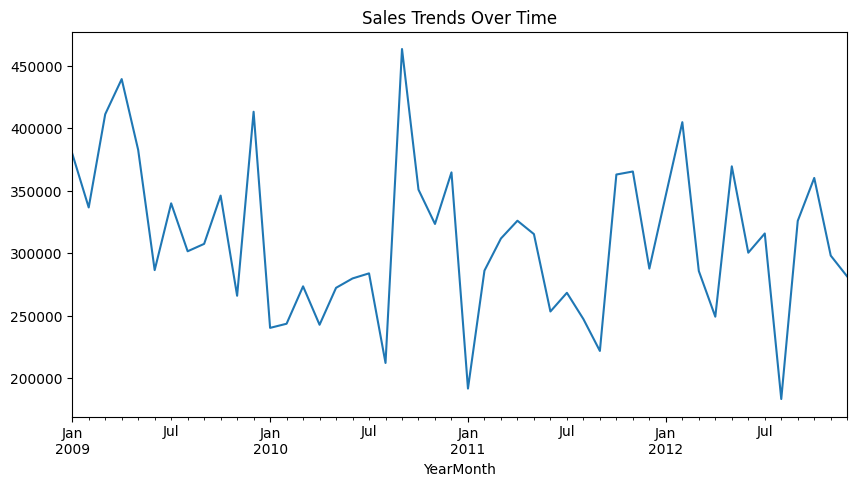

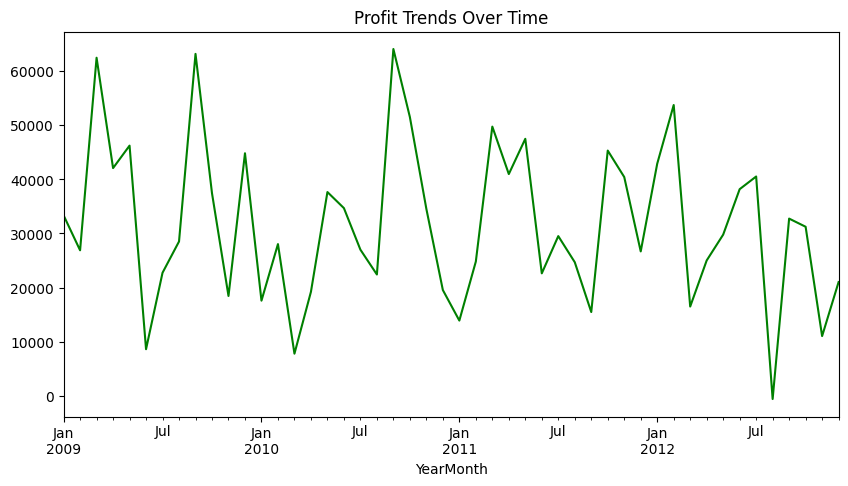

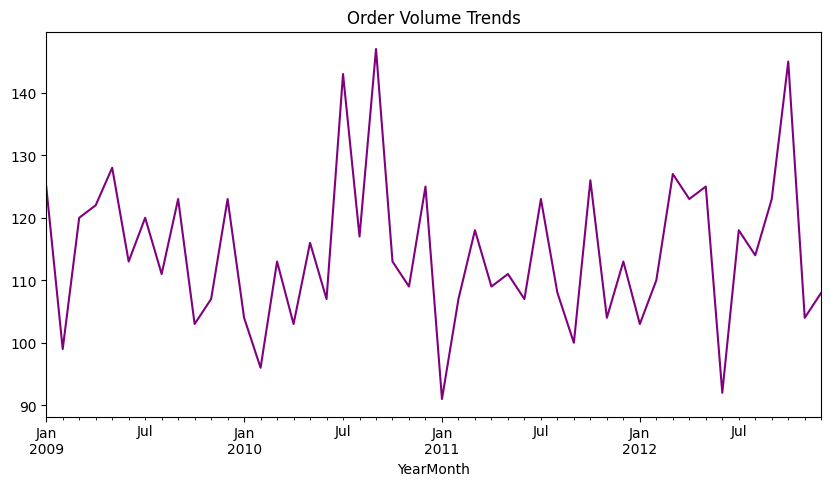

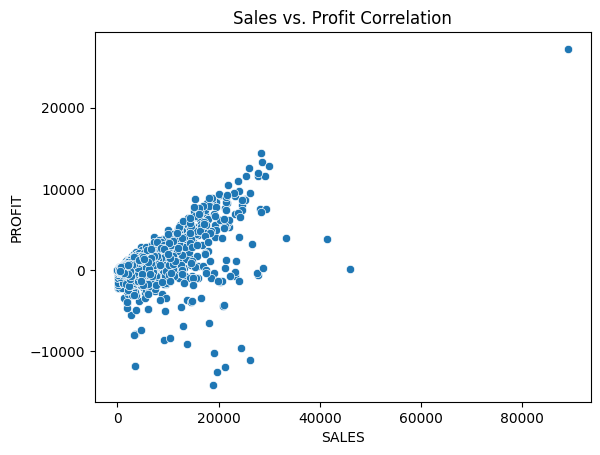

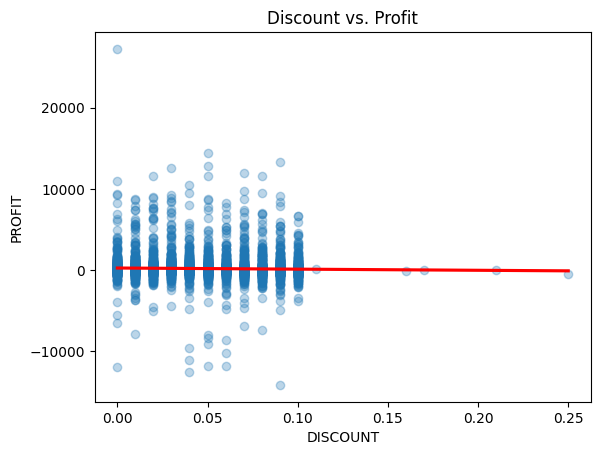

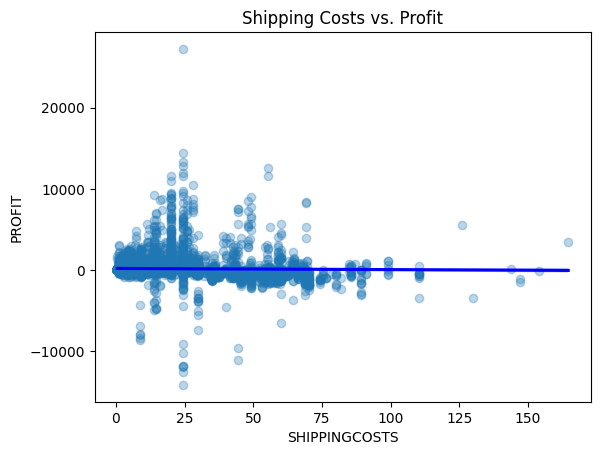


Top Customers by Sales and Profit:
                          SALES    PROFIT
CUSTOMERNAME                            
Emily Phan         117124.4380  34005.44
Deborah Brumfield   97433.1355  31121.22
Roy Skaria          92542.1530   1343.94
Sylvia Foulston     88875.7575   5141.90
Grant Carroll       88417.0025  27977.29
Alejandro Grove     83561.9300  20588.92
Darren Budd         81577.3435   1857.66
Julia Barnett       80044.4520  -1956.09
John Lucas          79696.1875  12725.08
Liz MacKendrick     76306.4315  20397.24


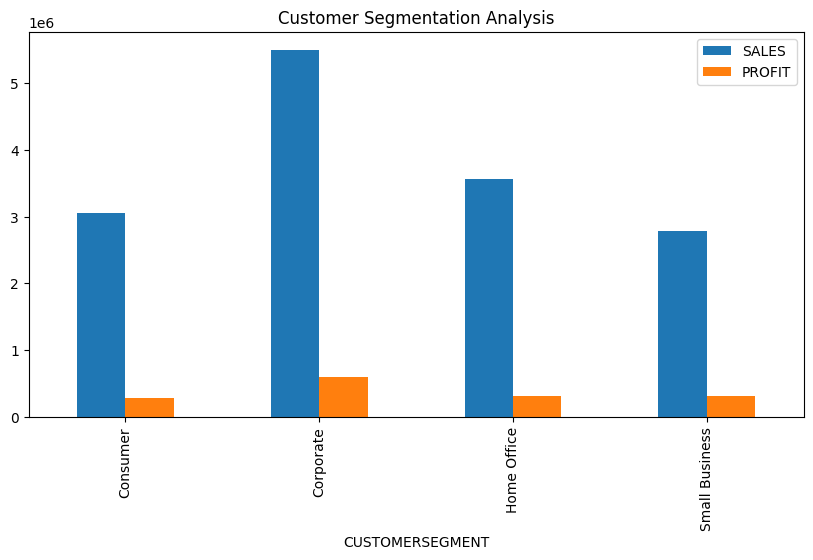

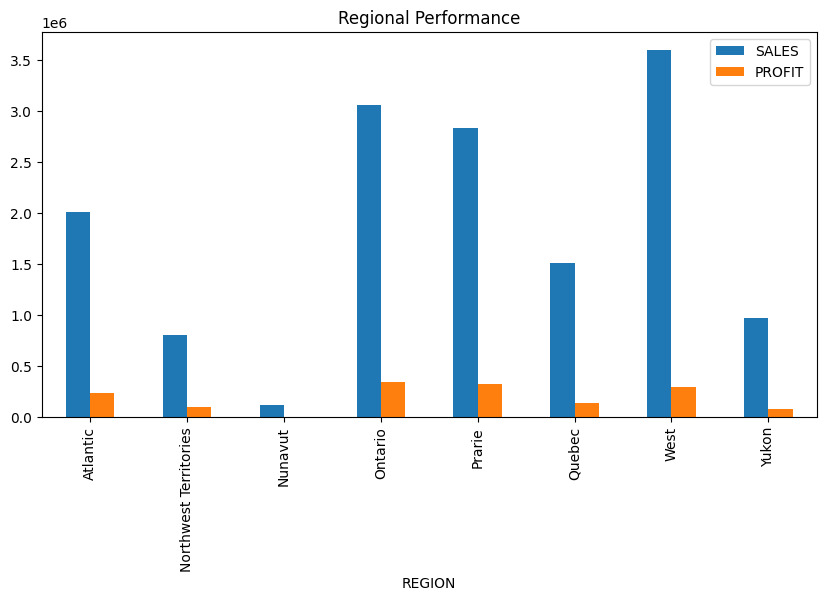


Top Performing Products:
                                                          SALES    PROFIT
PRODUCTNAME                                                             
Global Troy» Executive Leather Low-Back Tilter      275941.520  79284.78
Polycom ViewStation» ISDN Videoconferencing Unit    255303.970 -17771.27
Canon PC940 Copier                                  210910.680  47705.85
Riverside Palais Royal Lawyers Bookcase, Royale...  206494.130  14291.57
Hewlett Packard LaserJet 3310 Copier                194880.350  73299.61
Bretford CR8500 Series Meeting Room Furniture       147412.212  -1989.87
Sharp AL-1530CS Digital Copier                      130046.810  11770.30
Hewlett-Packard cp1700 [D, PS] Series Color Ink...  128100.430  55281.39
GBC DocuBind 200 Manual Binding Machine             120342.740  50462.53
Canon imageCLASS 2200 Advanced Copier               114173.410 -31885.68

Bottom Performing Products:
                                          SALES  PROFIT
PRODUCTNAME 

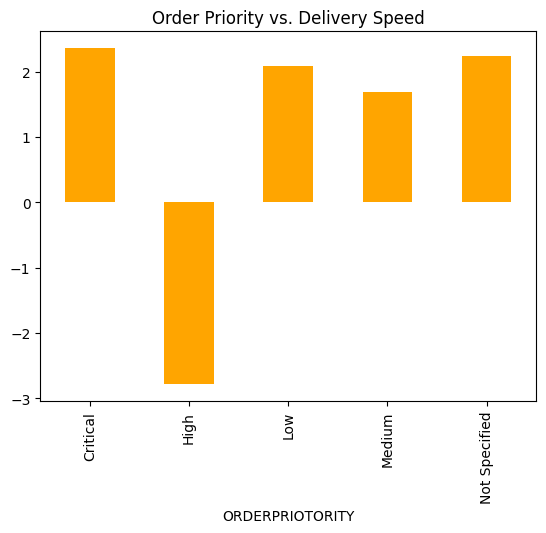

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "ORDERS.xlsx"
df = pd.read_excel(file_path)

# Convert date columns to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['SHIPDATE'] = pd.to_datetime(df['SHIPDATE'])

# 1. Descriptive Statistics
print("Descriptive Statistics:\n", df.describe())

# 2. Frequency Distribution
category_counts = df[['ORDERPRIOTORITY', 'SHIPMODE', 'CUSTOMERSEGMENT', 'REGION', 'PRODUCTCATEGORY']].apply(pd.Series.value_counts)
print("\nFrequency Distribution:\n", category_counts)

# 3. Profitability Analysis
df['Profit Margin'] = df['PROFIT'] / df['SALES'] * 100
grouped_profit = df.groupby(['PRODUCTCATEGORY', 'REGION', 'CUSTOMERSEGMENT'])['Profit Margin'].mean()
print("\nProfitability Analysis:\n", grouped_profit)

# 4. Sales Trends Over Time
df['YearMonth'] = df['ORDERDATE'].dt.to_period('M')
sales_trend = df.groupby('YearMonth')['SALES'].sum()
sales_trend.plot(title='Sales Trends Over Time', figsize=(10,5))
plt.show()

# 5. Profit Trends Over Time
profit_trend = df.groupby('YearMonth')['PROFIT'].sum()
profit_trend.plot(title='Profit Trends Over Time', figsize=(10,5), color='green')
plt.show()

# 6. Order Volume Trends
df.groupby('YearMonth')['ORDERID'].nunique().plot(title='Order Volume Trends', figsize=(10,5), color='purple')
plt.show()

# 7. Sales vs. Profit Correlation
sns.scatterplot(x=df['SALES'], y=df['PROFIT'])
plt.title("Sales vs. Profit Correlation")
plt.show()

# 8. Discount vs. Profit Analysis
sns.regplot(x=df['DISCOUNT'], y=df['PROFIT'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Discount vs. Profit")
plt.show()

# 9. Shipping Costs vs. Profit
sns.regplot(x=df['SHIPPINGCOSTS'], y=df['PROFIT'], scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
plt.title("Shipping Costs vs. Profit")
plt.show()

# 10. Top Customers by Sales and Profit
top_customers = df.groupby('CUSTOMERNAME')[['SALES', 'PROFIT']].sum().sort_values(by='SALES', ascending=False).head(10)
print("\nTop Customers by Sales and Profit:\n", top_customers)

# 11. Customer Segmentation
customer_seg = df.groupby('CUSTOMERSEGMENT')[['SALES', 'PROFIT']].sum()
customer_seg.plot(kind='bar', title='Customer Segmentation Analysis', figsize=(10,5))
plt.show()

# 12. Regional Performance
region_perf = df.groupby('REGION')[['SALES', 'PROFIT']].sum()
region_perf.plot(kind='bar', title='Regional Performance', figsize=(10,5))
plt.show()

# 13. Top & Bottom Performing Products
top_products = df.groupby('PRODUCTNAME')[['SALES', 'PROFIT']].sum().sort_values(by='SALES', ascending=False).head(10)
bottom_products = df.groupby('PRODUCTNAME')[['SALES', 'PROFIT']].sum().sort_values(by='SALES', ascending=True).head(10)
print("\nTop Performing Products:\n", top_products)
print("\nBottom Performing Products:\n", bottom_products)

# 14. Order Processing Time
df['Processing Time'] = (df['SHIPDATE'] - df['ORDERDATE']).dt.days
processing_time_analysis = df.groupby('ORDERPRIOTORITY')['Processing Time'].mean()
print("\nOrder Processing Time by Priority:\n", processing_time_analysis)

# 15. Shipping Mode Performance
shipping_performance = df.groupby('SHIPMODE')[['SALES', 'PROFIT', 'SHIPPINGCOSTS']].mean()
print("\nShipping Mode Performance:\n", shipping_performance)

# 16. Order Priority vs. Delivery Speed
priority_vs_speed = df.groupby('ORDERPRIOTORITY')['Processing Time'].mean()
priority_vs_speed.plot(kind='bar', title='Order Priority vs. Delivery Speed', color='orange')
plt.show()
